# Vector Calculus

Many machine learning algorithms are about minimizing or optimizing a **cost function** (also called **objective function**) with respect to a set of desired model parameters that control how well a model explains the data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

## Differentiation of univariate functions

We start with univariate function $y=f(x), with\ x,y \in R$.

### Definition of the derivative

$$
f'(x) = \frac{df(x)}{dx} = \lim_{\Delta x \rightarrow 0} \Big( \frac{f(x + \Delta x) - f(x)}{\Delta x} \Big)
$$

The derivative measures the slope of the tangent line. 

The best example of a derivative you deal with in real life is probably the **speedometer in your motorbike**. 
- If we call s(t) the distance that you've traveled, then v(t) = ds/dt is your speed at that point of time, which is to say **the rate that your traveled distance is changing**. 
- To be exact, the derivative is telling you the ***instantaneous* rate of change at that exact the moment**, hence ${\Delta x}$ is very small, basically approaching 0

![](http://labman.phys.utk.edu/phys135core/modules/m1/images/slope1.gif)

$$
f(x) = 2x^2 + 1
$$

Find the point where tangent line has slope 0
$$
f'(x) = 4x = 0 \rightarrow x = 0, y = 1
$$

In [ ]:
x_lim = np.array((-3, 3))
x = np.linspace(*x_lim, 100)

def f(x):
    return 2*x**2 + 1

def df(x): # DERIVATIVE OF F(X)
    epsilon = 0.000001 # delta_x
    delta_y = f(x+epsilon) - f(x) # y2 - y1
    return delta_y / epsilon

def tangent_line(x_0):
    y_0 = f(x_0)
    slope = df(x_0)
    bias = y_0 - slope*x_0
    return slope, bias

In [ ]:
# x_0 = 0.5
# x_0 = -1
x_0 = 0
slope, bias = tangent_line(x_0)
print(f'Tangent line: y = {slope}x + {bias}')

Tangent line: y = 1.999955756559757e-06x + 1.0


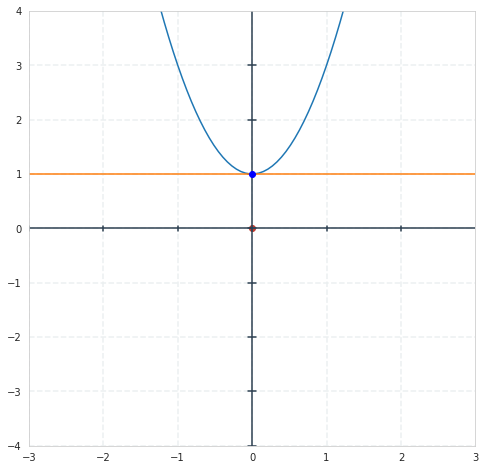

In [ ]:
plt.figure(figsize=(8, 8))

draw_grid(x_lim=x_lim)
plt.plot(x, f(x))
plt.plot(x, slope*x + bias)
plt.xlim(*x_lim)
plt.plot(x_0,f(x_0),'bo')
plt.show()

### Time saving rules

**Sum rule**

$$
\frac{d}{dx}(f(x) + g(x)) = \frac{d}{dx}(f(x)) + \frac{d}{dx}(g(x))
$$

**Power rule**

$$
f(x) = x^b
$$
<br/>
$$
f'(x) = bx^{b-1}
$$

**Product rule**

$$
f(x) = g(x)h(x)
$$
<br/>
$$
f'(x) = g'(x)h(x) + g(x)h'(x)
$$

**Quotient rule**
$$
f(x) = \frac {g(x)}{h(x)}
$$
<br/>
$$
f'(x) = \frac {g'(x)h(x) - g(x)h'(x)}{h(x)^2}
$$

**Chain rule**

If $f = f(g)$ and $g=f(x)$ then
$$
\frac{df}{dx} = \frac{df}{dg} \times \frac{dg}{dx}
$$

Question: $f = f(g)$, $g=g(h)$ and $h=h(x)$, or $f= f(g(h(x)))$, what is $\frac{df}{dx}$ ?

### Derivative of named function

$$
\frac{d}{dx}(\frac{1}{x}) = -\frac{1}{x^2}
$$

$$
\frac{1}{x} = x^{-1} => \frac{d}{dx}(\frac{1}{x}) = -1x^{-2} = \frac{-1}{x^2}
$$

<br/>
$$
\frac{d}{dx}( sinx) = cosx
$$
<br/>
$$
\frac{d}{dx}( cosx) = -sinx
$$
<br/>
$$
\frac{d}{dx}( e^x) = e^x
$$
<br/>
$$
\frac{d}{dx}(ln(x)) = \frac{1}{x}
$$

### Exercises

1. Find $\frac{df}{dx}$ when $$ f(x) = \frac{x^5}{3x+9}$$

2. Calculate $\frac{df}{dz}$ when $$  f(z) = \frac{1}{1 + e^{-z}}$$

Bonus: Calculate $\frac{df}{dz}$ in term of $f(z)$

* *Problem 1*

$$
f'(x) = \frac{5x^4(3x+9) - 3x^5}{(3x +9)^2} 
= \frac{12x^5+ 45x^4}{(3x +9)^2} 
=\frac{x^4\left(4x+15\right)}{3\left(x+3\right)^2} 
$$

* *Problem 2*
 $$  f(z) = \frac{1}{1 + e^{-z}}$$
 
$$
h(z) = e^{-z} \\
g(h) = 1 + e^{-z} = 1 + h \\
f(g) = \frac{1}{g} \\
$$

$$
\frac{df }{dz} = \frac{df}{dg} * \frac{dg}{dh} * \frac{dh}{dz}
$$

$$
\frac{df}{dg} = \frac{-1}{g^2} \\
\frac{dg}{dh} = 1 \\
\frac{dh}{dz} = -e^{-z}
$$



$$
\frac{df}{dz} = \frac{-1}{g^2}1(-e^{-z}) = \frac{e^{-z}}{(1+e^{-z})^2}
= \frac{1+ e^{-z} - 1}{(1+e^{-z})^2}
= \frac{1}{(1+e^{-z})} - \frac{1}{(1+e^{-z})^2} = f(z) - f(z)^2 = f(z) (1-f(z)) = f(1-f)
$$

### Computation Graph

Computation Graph applies a series of elementary arithmetic operations (e.g. addition, multiplication) and elementary functions (e.g. exp, log). By applying the chain rule to these operations, the gradients of quite complicated functions can be computed easier.

$ \sigma (z) = \frac{1}{1 + e^{-z}}$
<br/>
<img src="https://i.imgur.com/Qo6XnH7.png" width="500"/>


<br/>


 $$  f(z) = \frac{1}{1 + e^{-z}}$$
 
$$
h(z) = e^{-z} \\
g(h) = 1 + e^{-z} = 1 + h \\
f(g) = \frac{1}{g} \\
$$



In [ ]:
import numpy as np

In [ ]:
np.e

2.718281828459045

In [ ]:
def forward(z):
    h = np.exp(-z) # same as np.e**(-z)
    g = h + 1
    f = 1/g
    cache = (h, g)
    return f, cache

def backward(z, cache): #derivative of f with respect to z
    h,g = cache
    df_dg = -1 / (g**2)
    dg_dh = 1
    dh_dz = -h

    df_dz = df_dg * dg_dh * dh_dz  # chain rule
    return df_dz




![](https://dvqlxo2m2q99q.cloudfront.net/000_clients/981864/file/9818648EisiqmG.png)

In [ ]:
z_0 = 1
f, cache = forward(z_0)
print(f'f({z_0}) = {f}')
grad = backward(z_0, cache)
print(f'df/dz = {grad}')

f(1) = 0.7310585786300049
df/dz = 0.19661193324148188


In [ ]:
z_0 = -100
f, cache = forward(z_0)
print(f'f({z_0}) = {f}')
grad = backward(z_0, cache)
print(f'df/dz = {grad}')

f(-100) = 3.7200759760208356e-44
df/dz = 3.7200759760208356e-44


In [ ]:
z_0 = 0
f, cache = forward(z_0)
print(f'f({z_0}) = {f}')
grad = backward(z_0, cache)
print(f'df/dz = {grad}')

f(0) = 0.5
df/dz = 0.25


## Partial Derivatives and Gradients

We consider the general case when $x \in R^n$, and, $f(x) = f(x_1, x_2, \dots, x_n)$. The generalization of the derivative to functions of serveral variables is the **gradient**.

$$
\nabla f = grad f = \frac{df}{dx} = 
\Big[ 
    \frac{\partial f}{\partial x_1} \
    \frac{\partial f}{\partial x_2} \
    \dots
    \frac{\partial f}{\partial x_n}
\Big]
$$

**Example:**

Consider function $f(x,y)=3x^2y$

- The partial derivative with respect to x: $\frac{\partial f}{\partial x}3x^2y = 3y\frac{\partial f}{\partial x}x^2 = 6xy$. 
- The partial derivative with respect to y: $\frac{\partial f}{\partial y}3x^2y = 3x^2\frac{\partial f}{\partial y}y = 3x^2$

Gradient of $f(x,y)$ is written as:

$$
\nabla f(x,y) =
\Big[ 
    \frac{\partial f(x,y)}{\partial x} \
    \frac{\partial f(x,y)}{\partial y}
\Big] =
\Big[
    6yx,3x^2
\Big]
$$

**Example**

<div align="center">
    <img src="https://i.imgur.com/b7zoo7n.png" width="600" />
</div>

With $X$ is the dataset:
$$
X = 
\begin{pmatrix} 
    x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)} \\
    \dots & \dots & \dots & \dots \\
    x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)} \\
\end{pmatrix}_{m \times n}
$$

$$
w = \begin{pmatrix}
w_1 \\ w_2 \\ \dots \\ w_n
\end{pmatrix}
$$


With $\vec{w}$ is the weights vector and $b$ is the bias:

$$
\hat{y} = \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \dots \\ y^{(m)}\end{pmatrix} = Xw + b = 
\begin{pmatrix} 
    (\sum_{i=1}^{n}{w_ix_i^{(1)}}) + b \\
    (\sum_{i=1}^{n}{w_ix_i^{(2)}}) + b \\
    \dots \\
    (\sum_{i=1}^{n}{w_ix_i^{(m)}}) + b \\
\end{pmatrix} =
\begin{pmatrix} 
    w.x^{(1)} + b \\
    w.x^{(2)} + b \\
    \dots \\
    w.x^{(m)} + b \\
\end{pmatrix}
$$

Find $\nabla \hat{y} $

$$
\frac{\partial \hat{y}}{\partial w} = ?
$$


$$
\frac{\partial \hat{y}}{\partial b} = ?
$$